In [6]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
dev = qml.device("default.qubit", wires = 4)

In [7]:
def Uf(type):
    if type == 'all one':
        qml.PauliX(wires = 3)
    elif type == 'balanced':
        qml.PauliX(0)
        qml.CNOT([0,3])
        qml.PauliX(0)
        qml.CNOT([1, 3])
        qml.PauliX(wires = 2)
        qml.CNOT(wires = [2,3])
        qml.PauliX(wires = 2)
    
@qml.qnode(dev)
def circuit(type):
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    qml.PauliX(wires = 3)
    qml.Hadamard(wires = 3)
    
    Uf(type)
    
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    return qml.probs([0, 1, 2])
    

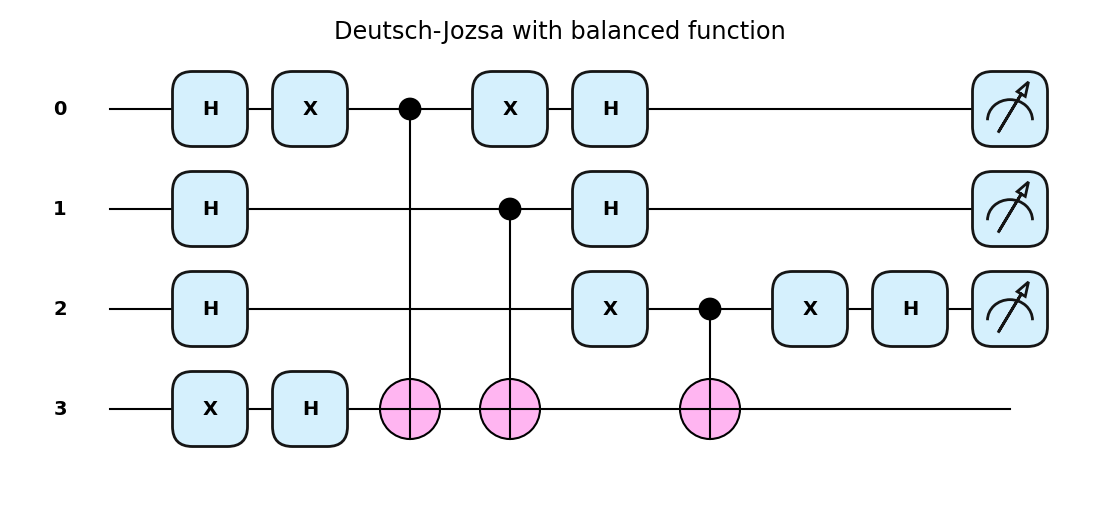

probabilities= [0. 0. 0. 0. 0. 0. 0. 1.]


In [11]:
type ='balanced'  #'all one' 'all zero' 'balanced'


fig, ax = qml.draw_mpl(circuit, style = 'pennylane')(type)
fig.suptitle("Deutsch-Jozsa with " + type + " function" , fontsize="xx-large")
plt.show()


probs = circuit(type);
print('probabilities=', probs)